In [1]:
# Load in the necessary Python libraries. We will be using pandas, numpy and matplotlib (for now). 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### What dataset will we be using?
We will be working with a dataset talking about wind turbines. Wind power is an abundant form of renewable energy that helps to avoid 329 million metric tons of CO2 emissions every year.
<br></br>
Wind turbines harness the power of wind to generate electricity, using mechanical power to spin a generator. Turbines are particularly effective because they can provide electricity without burning any fuel or polluting the air. Offshore and onshore wind farms are becoming increasingly common around the world. The London Array in the United Kingdom is one such example, featuring 175 wind turbines that generate enough energy to power nearly half a million homes.
<br></br>
This dataset could be useful if we wish to learn more about the distribution of various specs about wind turbines. For example, we can learn where the majority of wind turbines are located (within the United States), how much electricity they generate (kilo or mega watts), the geographical coordinates of the turbines, and more!
<br></br>
If you would like to access this dataset from the source, you can find it here: https://corgis-edu.github.io/corgis/csv/wind_turbines/. Additionally, it can also tell you more information about what each column means, as some datasets can contain very misinformative column names!|

In [2]:
import os

os.getcwd()

'C:\\Users\\TESTUSER\\Desktop\\CO-OP\\M2M Tech\\Jupyter\\Python-Workshops\\CleanTech\\Visualization'

In [3]:
# Go into the data folder, and read in the csv dataset into the Python workspace. 
# Then, name that item "data".
data = pd.read_csv('../data/wind_turbines.csv')
# data.head() # print out only the first few rows, for easy viewing.

### What does running ```.info()``` tell us about our EV dataset?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63961 entries, 0 to 63960
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site.State               63961 non-null  object 
 1   Site.County              63961 non-null  object 
 2   Year                     63961 non-null  int64  
 3   Turbine.Capacity         63961 non-null  int64  
 4   Turbine.Hub_Height       63961 non-null  float64
 5   Turbine.Rotor_Diameter   63961 non-null  float64
 6   Turbine.Swept_Area       63961 non-null  float64
 7   Turbine.Total_Height     63961 non-null  float64
 8   Project.Capacity         63961 non-null  float64
 9   Project.Number_Turbines  63961 non-null  int64  
 10  Site.Latitude            63961 non-null  float64
 11  Site.Longitude           63961 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 5.9+ MB


- It contains 12 columns and 63961 rows.
- There are 7 float64 columns, 3 int64 columns, and 2 object columns.
- There are no missing values! Every single column has 63961 non-null values.

### Let's Execute ```.describe()``` to give us Summary Statistics about our Numerical Columns!

In [5]:
data.describe()

,Year,Turbine.Capacity,Turbine.Hub_Height,Turbine.Rotor_Diameter,Turbine.Swept_Area,Turbine.Total_Height,Project.Capacity,Project.Number_Turbines,Site.Latitude,Site.Longitude
count,63961.000000,63961.000000,63961.000000,63961.000000,63961.000000,63961.000000,63961.000000,63961.000000,63961.000000,63961.000000
mean,2011.768593,1945.300714,80.265244,94.682148,7472.673751,127.634646,171.037738,96.923172,-99.688416,38.592440
std,6.444849,689.733922,12.466083,23.449221,3267.170143,22.946809,102.126002,69.180367,11.005005,5.487171
min,1983.000000,50.000000,22.800000,14.000000,153.940000,30.400000,0.050000,1.000000,-171.713074,13.389381
25%,2008.000000,1500.000000,80.000000,82.000000,5281.020000,121.000000,100.000000,56.000000,-102.597290,34.252995
50%,2012.000000,2000.000000,80.000000,97.000000,7389.810000,130.100000,160.000000,85.000000,-99.329704,39.316921
75%,2017.000000,2300.000000,85.000000,110.000000,9503.320000,144.500000,211.220000,120.000000,-94.947594,42.991066
max,2021.000000,6000.000000,131.000000,155.000000,18869.190000,199.600000,525.020000,460.000000,144.722656,66.839905


### Obtaining numerical summaries is great, but we won't truly understand our data until we perform some visualizations!
Let's take a look at the diameter of the rotor and turbine capacity.
<br>
Before we throw our data on a plot, let's think about what it **should** look like. 
<br>
As rotor diameter increases, should the amount of electricity generated (turbine capacity) increase or decrease?

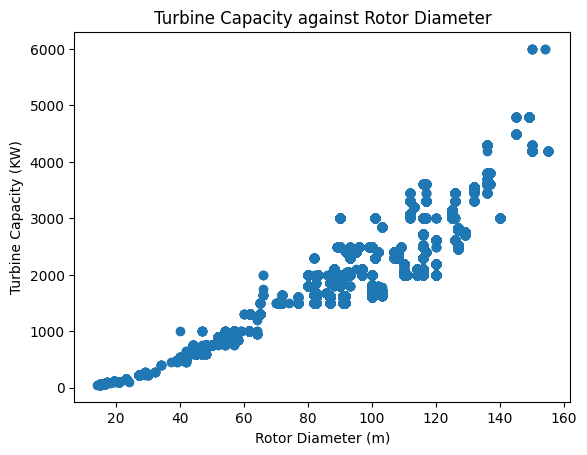

In [6]:
plt.scatter(data['Turbine.Rotor_Diameter'], data['Turbine.Capacity'])

plt.title("Turbine Capacity against Rotor Diameter")
plt.xlabel("Rotor Diameter (m)")
plt.ylabel("Turbine Capacity (KW)")

plt.show()

We can conclude that there is a **strong positive** relationship between rotor diameter annd turbine capacity. That is, as rotor diameter increases, so does turbine capacity!

### Let's dig deeper and look at the distribution of turbines across different states!

In [7]:
states = data['Site.State'].value_counts().loc[lambda x : x > 500] # Retrieve only the states that have at least 500 turbines 
# print(states.index)
# print(states.values)

statesDataframe = pd.DataFrame({'State': states.index , 'Number of Turbines': states.values})
statesDataframe.head()

,State,Number of Turbines
0,TX,16306
1,IA,5889
2,OK,4556
3,CA,4082
4,KS,3479


### Let's explore an Alternative Way of Creating a Dataframe from a Series. 

In [8]:
# statesDataframe2 = pd.DataFrame(states).reset_index()  
# statesDataframe2.columns = ['State','Number of Turbines']
# statesDataframe2.head()


### Creating the bar plot:

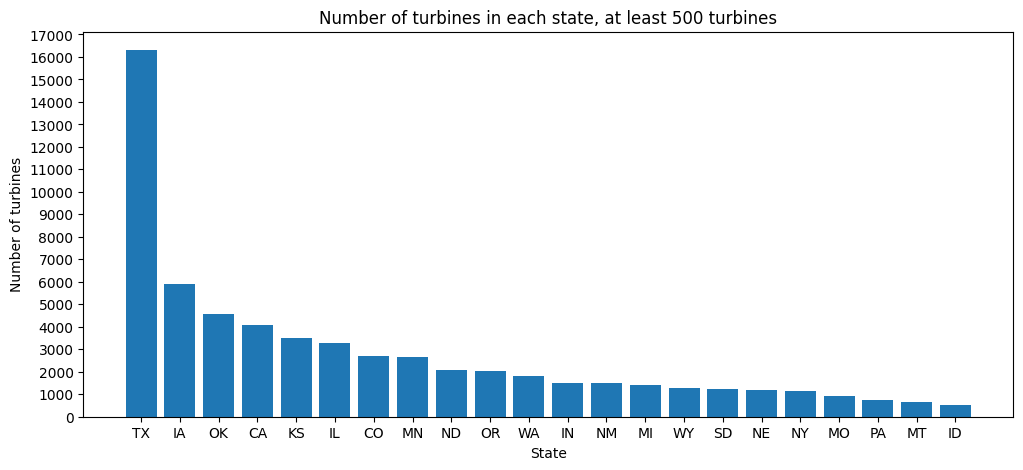

In [9]:
plt.figure(figsize=(12,5))
plt.bar(statesDataframe['State'], statesDataframe['Number of Turbines'])

plt.yticks(np.arange(0, statesDataframe['Number of Turbines'].max()+1000, 1000))

plt.title("Number of turbines in each state, at least 500 turbines")
plt.xlabel("State")
plt.ylabel("Number of turbines")

plt.show()

As the graph suggests, Texas held the highest number of turbines, and there's quite a large gap from Texas to the next state, IA (Iowa).
<br>
From this graph, the reader could deduce that Texas has lots of windy areas and maybe lots of hills. This could be why there's so many wind turbines in Texas.

### Newer turbine = Better performance?
Now, I want to see if the year that the turbine became operational has an impact on their electrical output. Perhaps as time goes on, turbine technology & design improves? They may become more efficient and streamlined at generating electricty. 

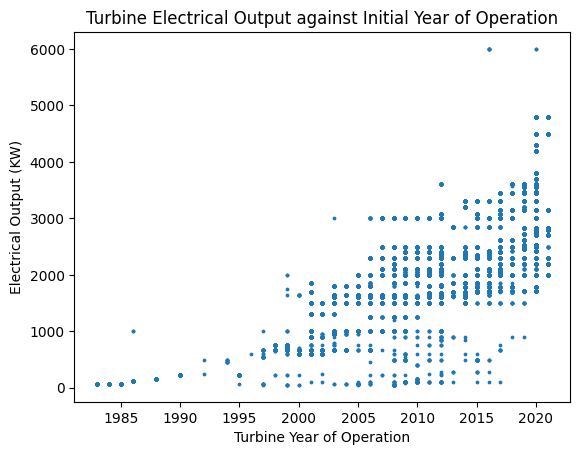

In [10]:
data.head()
operationYear = data['Year']
turbineCapacity = data['Turbine.Capacity']

plt.title("Turbine Electrical Output against Initial Year of Operation")
plt.xlabel("Turbine Year of Operation")
plt.ylabel("Electrical Output (KW)")

plt.scatter(operationYear, turbineCapacity, [3])
plt.show()

### How can we get Electrical Output Aggregated for every Year?

Let's try using Bokeh for this task!

In [11]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [12]:
meanYearData = data[['Year', 'Turbine.Capacity']].groupby(['Year'], as_index=False).mean()

year = meanYearData['Year'].astype(str)
turbineCapacity = meanYearData['Turbine.Capacity']

source = {'year':year , 'turbineCapacity':turbineCapacity}

In [13]:
visual = figure(title="Averaged Turbine Electrical Output against Year of Operation", x_range=year, y_range=(0,turbineCapacity.max()), 
                x_axis_label = "Turbine Year of Operation", y_axis_label = "Average Electrical Output (KW) (for particular year)")

In [14]:
import math
from bokeh.models.tools import HoverTool

visual.vbar(x='year', top='turbineCapacity', width=0.7, source=source)
visual.xaxis.major_label_orientation = math.pi/2
visual.add_tools(HoverTool(tooltips=[("Year", "@year"), ("turbineCapacity", "@turbineCapacity KW")]))

In [15]:
show(visual)